<a href="https://colab.research.google.com/github/devKOfori/machine-vision/blob/main/glasses_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
!pip install roboflow
!pip install python-dotenv

In [11]:
import os
import torch
import ultralytics
from ultralytics import YOLO
import numpy as np
import cv2
import matplotlib.pyplot as plt
from roboflow import Roboflow

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
from dotenv import load_dotenv
load_dotenv("/content/drive/MyDrive/.env", "w")
API_KEY = os.getenv("RF_API_KEY")

In [15]:
# loading dataset from Roboflow
rf = Roboflow(api_key=API_KEY)
project = rf.workspace("glasses-detection-workspace").project("glasses-detection-xoiav")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [5]:
# creating an instance of YOLO11 model
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 89.0MB/s]


In [ ]:
# finetuning the model on the custom dataset
results = model.train(data="/content/Glasses-Detection-2/data.yaml", epochs=20)


image 1/1 /content/Glasses-Detection-2/test/images/00009_png.rf.29af9ddc28e9f1a9a1247db507ae0e39.jpg: 640x640 1 glasses, 12.1ms
Speed: 4.9ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


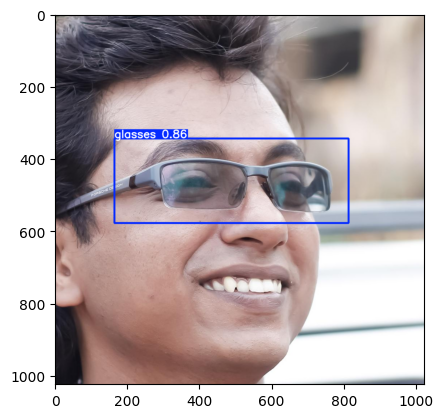

In [20]:
# Loading the weights of the finetuned model and testing on a test image.
model = YOLO("/content/best.pt")
results = model("/content/Glasses-Detection-2/test/images/00009_png.rf.29af9ddc28e9f1a9a1247db507ae0e39.jpg", save=True)
plt.imshow(results[0].plot()[...,::-1])

In [4]:
def live_detection():
  '''
  This function performs live detection of glasses in the webcam feed.
  This function will not run in colab. You can download the notebook and run it in your local machine OR
  you can download the model weights and run it in your local machine.
  '''
    S = 0
    cap = cv2.VideoCapture(S)
    # retrieve the frame width and height
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    writer = cv2.VideoWriter('glasses_detection.mp4', cv2.VideoWriter_fourcc(*'XVID'), 30, (frame_width, frame_height))
    win_name = 'Live Detection'
    cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)

    # using saved model weights to create YOLO model
    model = YOLO("/content/best.pt")
    print(model)

    while cap.isOpened and cv2.waitKey(1) != 27:
        has_frame, frame = cap.read()
        if not has_frame:
            break

        results = model(frame)

        for result in results:
            annotated_frame = result.plot()
            writer.write(annotated_frame)
        cv2.imshow(win_name, annotated_frame)

    cap.release()
    cv2.destroyAllWindows()


In [21]:
# live_detection()